In [127]:
%%HTML
<h1>Libraries</h1>
<ul>
    <li>pandas and seaborn - data analysis</li>
    <li>scikit-learn - machine learning and data mining</li>
    <li>pefile - pefile information extraction</li>
</ul>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

sns.set(style="whitegrid", color_codes=True)

data_original = pd.read_csv('data.csv', sep='|')


malicious_binaries_original = data_original[41323::]
dasmalwerk_binaries = pd.read_csv('dasmalwerk_data.csv', sep='|')
temp = [malicious_binaries_original, dasmalwerk_binaries]
malicious_binaries = pd.concat(temp)
legit_binaries = data_original[0:41323]

frames = [data_original, dasmalwerk_binaries]
data = pd.concat(frames)

In [81]:
%%HTML
<h1>1. Exploratory Data Analysis</h1>

In [82]:
malicious_binaries.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,97812.000000,97812.000000,97812.000000,97812.000000,97812.000000,9.781200e+04,9.781200e+04,9.781200e+04,9.781200e+04,9.781200e+04,...,97812.000000,97812.000000,97812.000000,97812.000000,9.781200e+04,9.781200e+04,9.781200e+04,9.781200e+04,97812.000000,97812.0
mean,356.732262,224.013250,3271.686173,8.563970,5.020376,1.775303e+05,5.168360e+05,1.631619e+05,1.745101e+05,8.112110e+04,...,14.175858,4.140027,2.269352,5.928961,7.421060e+04,2.543978e+04,3.211231e+05,6.572179e+05,10.681757,0.0
std,917.646202,0.599752,9336.465549,4.839653,13.876564,6.776564e+06,2.492483e+07,2.034978e+07,4.055213e+06,6.567450e+06,...,32.872526,1.239004,0.701444,1.498942,9.265193e+06,7.724832e+06,2.521905e+07,3.099285e+07,7.382888,0.0
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.788800e+04,1.198080e+05,0.000000e+00,1.481900e+04,4.096000e+03,...,6.000000,3.501717,2.160964,5.217246,1.797120e+03,4.800000e+01,7.336000e+03,0.000000e+00,0.000000,0.0
50%,332.000000,224.000000,258.000000,10.000000,0.000000,1.172480e+05,3.834880e+05,0.000000e+00,5.890600e+04,4.096000e+03,...,7.000000,3.752798,2.458492,5.317552,2.739500e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.0
75%,332.000000,224.000000,259.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.156200e+04,4.096000e+03,...,14.000000,4.453368,2.458492,7.497521,1.260380e+04,4.800000e+01,2.905600e+04,7.200000e+01,15.000000,0.0
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,3060.000000,7.999723,7.999723,7.999993,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,0.0


In [83]:
legit_binaries.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,41323.000000,41323.000000,41323.000000,41323.000000,41323.000000,4.132300e+04,4.132300e+04,4.132300e+04,4.132300e+04,4.132300e+04,...,41323.000000,41323.000000,41323.000000,41323.000000,4.132300e+04,41323.000000,4.132300e+04,41323.000000,41323.000000,41323.0
mean,13395.021465,230.135469,7224.176802,8.728118,1.157709,3.964534e+05,2.910853e+05,9.512200e+02,1.712543e+05,5.093258e+03,...,40.929676,3.655430,2.807764,4.561510,9.822650e+03,528.408513,6.684507e+04,30.777243,16.312102,1.0
std,16566.440057,7.779781,3028.776865,1.164991,3.506482,1.376922e+06,2.231547e+06,5.145491e+04,6.547930e+05,2.869765e+04,...,243.389555,0.648224,0.960851,1.439574,8.989146e+04,433.608805,1.694117e+06,40.247742,2.145069,0.0
min,332.000000,224.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.0
25%,332.000000,224.000000,8226.000000,8.000000,0.000000,7.168000e+03,6.144000e+03,0.000000e+00,4.581000e+03,4.096000e+03,...,1.000000,3.405390,2.471368,3.543990,8.320000e+02,126.000000,9.280000e+02,0.000000,16.000000,1.0
50%,332.000000,224.000000,8450.000000,9.000000,0.000000,6.041600e+04,2.355200e+04,0.000000e+00,2.017300e+04,4.096000e+03,...,2.000000,3.552150,3.369698,3.602333,9.600000e+02,356.000000,1.064000e+03,0.000000,16.000000,1.0
75%,34404.000000,240.000000,8450.000000,9.000000,0.000000,2.641920e+05,1.126400e+05,0.000000e+00,9.743150e+04,4.096000e+03,...,8.000000,3.920401,3.540218,5.169307,1.965172e+03,928.000000,9.640000e+03,72.000000,17.000000,1.0
max,34404.000000,240.000000,33679.000000,48.000000,60.000000,5.163418e+07,3.229082e+08,4.197376e+06,4.525109e+07,3.014656e+06,...,7694.000000,7.412816,5.140800,8.000000,3.907291e+06,7224.000000,3.124797e+08,160.000000,26.000000,1.0


In [84]:
%%HTML
<h2>1.1. Single feature</h2>

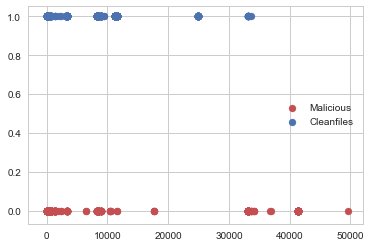

In [85]:
%matplotlib inline

fig,ax = plt.subplots()
x = malicious_binaries["Characteristics"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries['Characteristics']
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

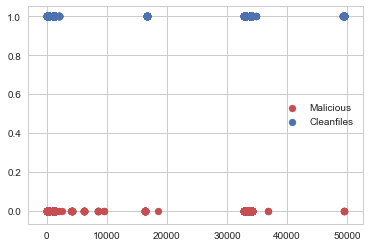

In [86]:
fig,ax = plt.subplots()
x = malicious_binaries["DllCharacteristics"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries['DllCharacteristics']
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

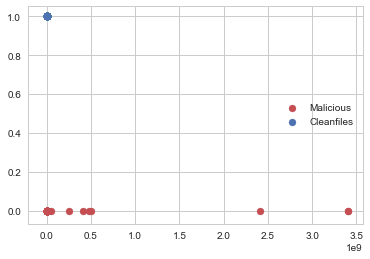

In [87]:
fig,ax = plt.subplots()
x = malicious_binaries["NumberOfRvaAndSizes"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["NumberOfRvaAndSizes"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

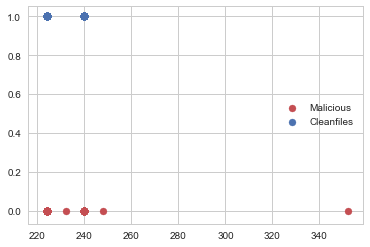

In [88]:
fig,ax = plt.subplots()
x = malicious_binaries["SizeOfOptionalHeader"]
y = malicious_binaries['legitimate']
ax.scatter(x,y,color='r',label='Malicious')
x1 = legit_binaries["SizeOfOptionalHeader"]
y1 = legit_binaries['legitimate']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

In [89]:
%%HTML
<h2>1.2. Double feature relation</h2>

In [94]:
sample1000 = pd.concat([legit_binaries[:1000], dasmalwerk_binaries[:1000]])

In [95]:
resources = ['ResourcesNb','ResourcesMeanEntropy','ResourcesMinEntropy','ResourcesMaxEntropy','ResourcesMeanSize','ResourcesMinSize','ResourcesMaxSize']

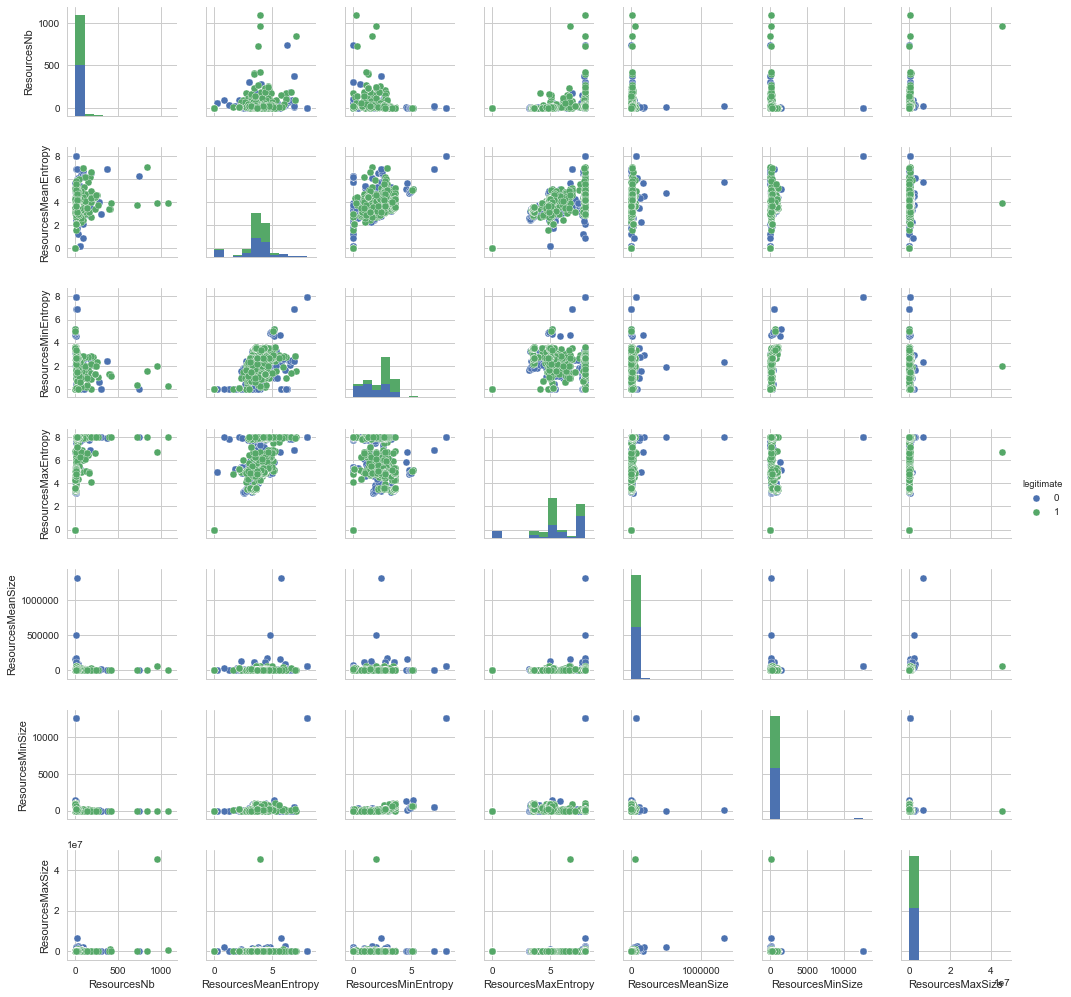

In [96]:
%matplotlib inline
sns.pairplot(sample1000, vars=resources, hue="legitimate", size=2)
plt.show()

In [97]:
sections =[ 'SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize']

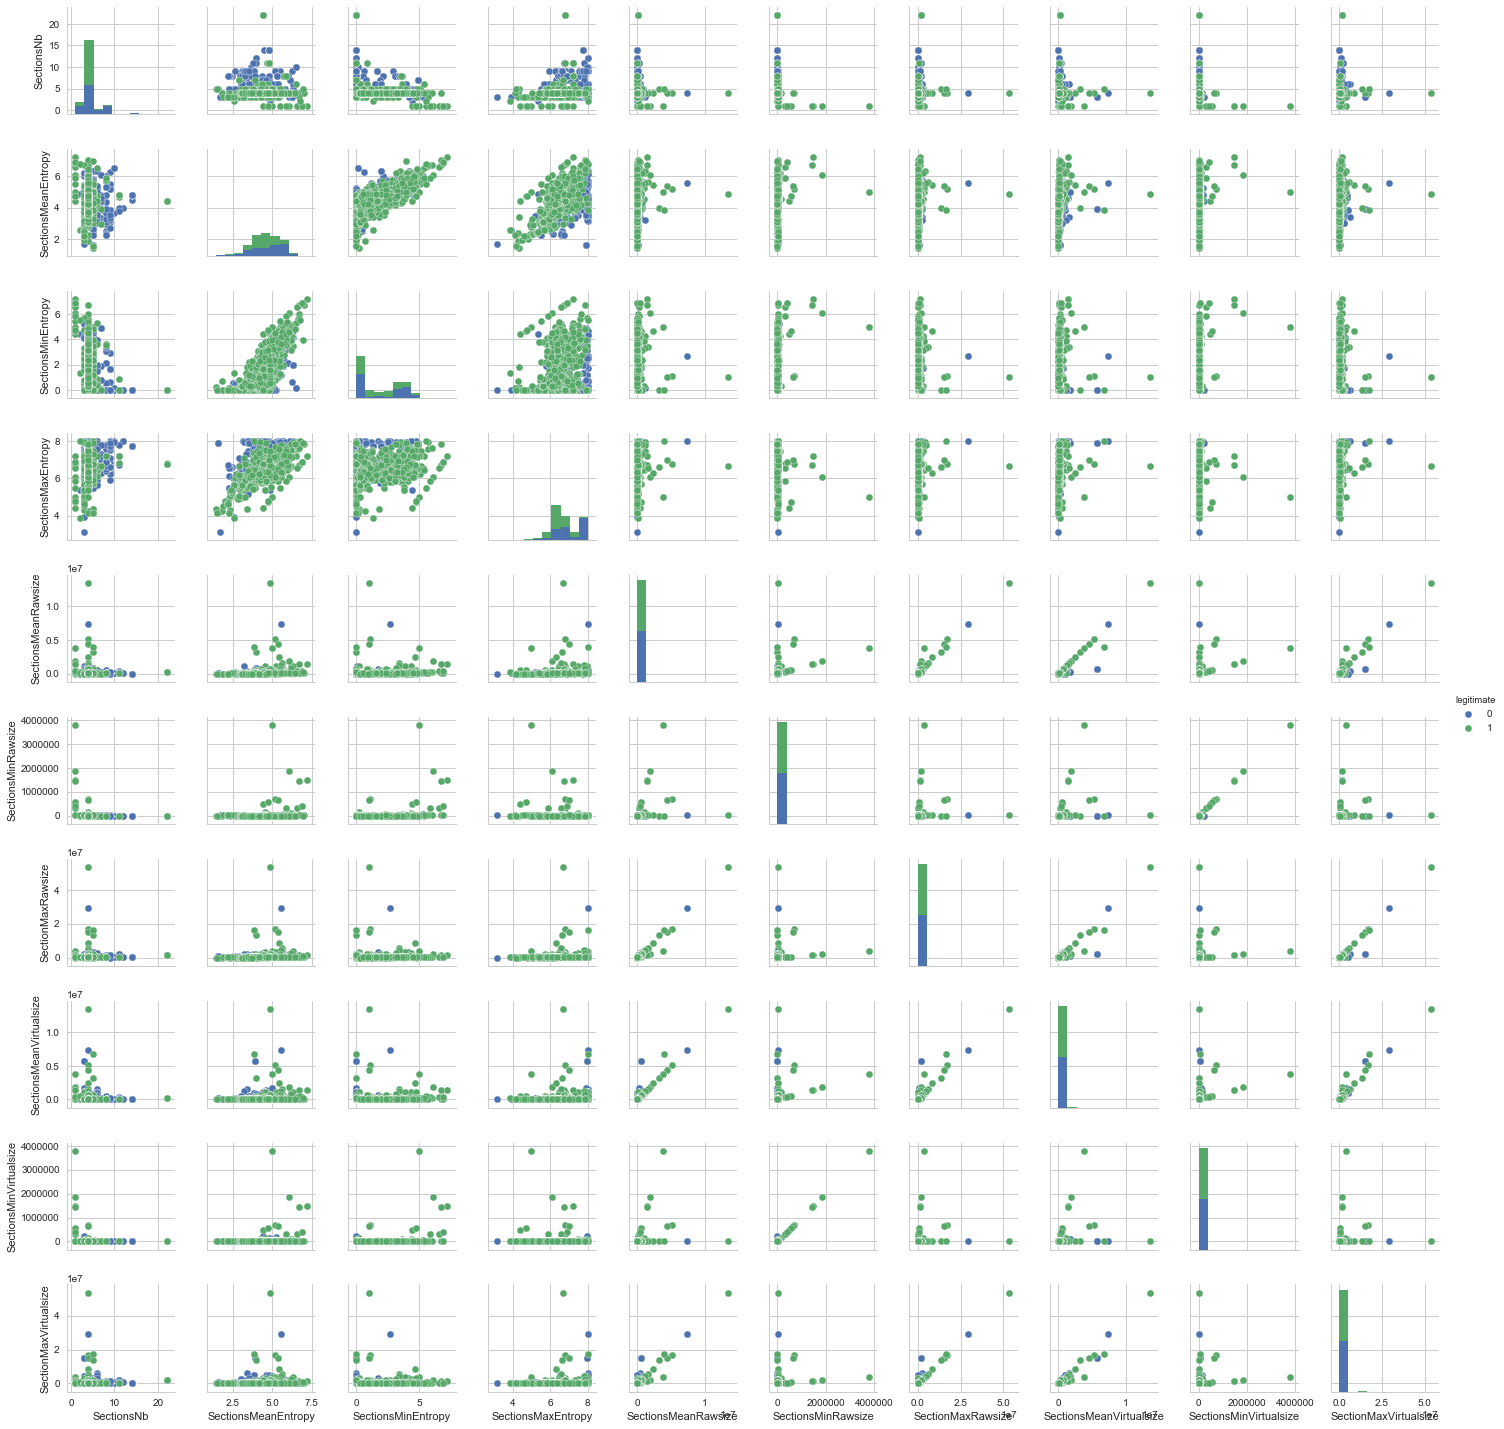

In [98]:
%matplotlib inline
sns.pairplot(sample1000, vars=sections, hue="legitimate", size=2)
plt.show()

In [99]:
sample1000_x = sample1000.drop('legitimate', 1)

In [100]:
corr = sample1000_x.corr()

In [101]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


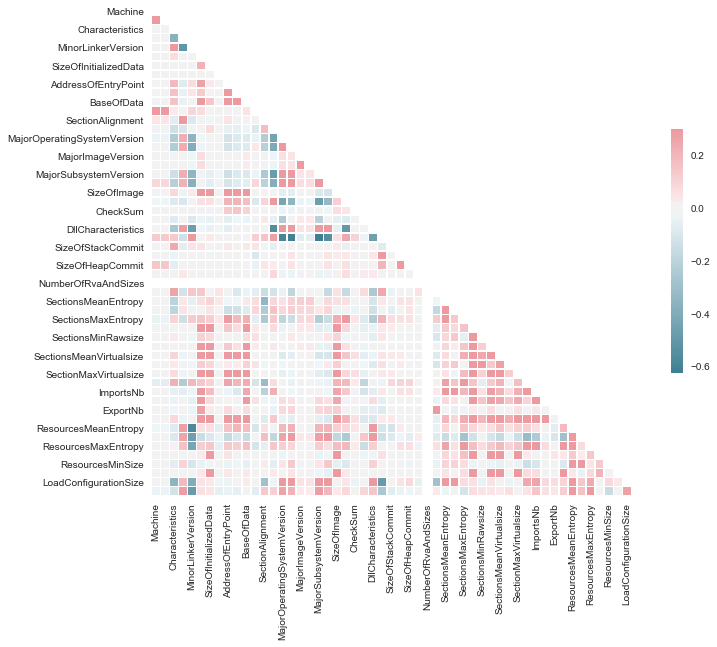

In [102]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
%%HTML
<h2>1.3. Automatic feature selection</h2>

In [113]:
#separate labels
X = data.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = data['legitimate'].values

#feature reduction
fsel = ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)

X_new = model.transform(X)
nb_features = X_new.shape[1]
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
std = np.std([tree.feature_importances_ for tree in fsel.estimators_], axis=0)
for f in range(nb_features):
    print("%d. %s (%f)" % (f + 1, data.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

1. Machine (0.169488)
2. DllCharacteristics (0.120298)
3. ImageBase (0.115208)
4. Characteristics (0.103726)
5. Subsystem (0.075733)
6. SectionsMaxEntropy (0.049359)
7. ResourcesMaxEntropy (0.039777)
8. MajorSubsystemVersion (0.037933)
9. ResourcesMinEntropy (0.034507)
10. SizeOfOptionalHeader (0.030833)
11. MinorLinkerVersion (0.030341)
12. VersionInformationSize (0.022665)


In [123]:
features = []
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(data.columns[2+f])

In [124]:
%%HTML
<h1>2. Model selection</h1>

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

algorithms = {
        "DecisionTree": DecisionTreeClassifier(max_depth=10),
        "RandomForest": RandomForestClassifier(n_estimators=50),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=50),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "GNB": GaussianNB()
        #"MLP": MLPClassifier(hidden_layer_sizes=(12,12,12,12,12,12)),
       # "SVM": svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    #decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    #max_iter=-1, probability=False, random_state=None, shrinking=True,
    #tol=0.001, verbose=False)
    }
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.25)
print("\nNow testing algorithms")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))


Now testing algorithms
GNB : 70.020699 %
DecisionTree : 99.019664 %
RandomForest : 99.404899 %
AdaBoost : 98.634430 %
GradientBoosting : 98.916168 %

Winner algorithm is RandomForest with a 99.404899 % success


In [119]:
%%HTML
<h1>3. Save the model and the features</h1>

In [126]:
from sklearn.externals import joblib
import pickle
joblib.dump(algorithms[winner], 'models/' + winner + '.pkl')
open('models/features.pkl', 'w').write(pickle.dumps(features))